1. Introduction to Problem
2. Importing the libraries
3. Type of machine learning system to build
4. Loading the data
5. Exploratory Data Analysis and cleaning
6. Visualization of data, finding patterns
7. Feature Engineering
8. Choosing the best model
9. Training the model
10. Make Predictions
11. Submission

# Survival Rate of Titanic Passengers

In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

col = ['viridis','plasma','inferno','magma','cividis','cool','hot','spring','summer','autumn','winter','gray']

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

Models to use:
- Random Forest Classifier

In [211]:
gender = pd.read_csv('./data/gender_submission.csv', header=0)
train = pd.read_csv('./data/train.csv', header=0)
test = pd.read_csv('./data/test.csv', header=0)

In [95]:
def info_data(data):
    df = pd.DataFrame(columns=['Column', 'Count', 'Null', '% Null', 'Type', 'Unique', 'Mean', 'Std', 'Min', '25%', '50%', '75%', 'Max', 'Sample'])
    for i, (col, cnt) in enumerate(data.count().items()):
        null_count = data.shape[0] - cnt
        null_percentage = round((null_count / data.shape[0]) * 100, 2)
        data_type = data[col].dtype
        unique = data[col].nunique()
        if np.issubdtype(data[col].dtype, np.number):
            mean = round(data[col].mean(), 2)
            std = round(data[col].std(), 2)
            minimum = round(data[col].min(), 2)
            twenty_five = round(data[col].quantile(0.25), 2)
            fifty = round(data[col].quantile(0.5), 2)
            seventy_five = round(data[col].quantile(0.75), 2)
            maximum = round(data[col].max(), 2)
        else:
            mean = std = minimum = twenty_five = fifty = seventy_five = maximum = '-'
        sample = data[col].sample(1).values[0]
        df.loc[i] = [col, cnt, null_count, null_percentage, data_type, unique, mean, std, minimum, twenty_five, fifty, seventy_five, maximum, sample]

    return df

In [ ]:
info_data(train)

In [ ]:
# ages that survived
age_survived = train[['Age','Survived']].dropna()
age_survived['Age'] = age_survived['Age'].astype(int)
age_survived = age_survived[age_survived['Survived'] == 1]

# ages that did not survive
age_not_survived = train[['Age','Survived']].dropna()
age_not_survived['Age'] = age_not_survived['Age'].astype(int)
age_not_survived = age_not_survived[age_not_survived['Survived'] == 0]

plt.figure(figsize=(15,5))
plt.hist(age_survived['Age'], bins=20, alpha=0.5, label='Survived')
plt.hist(age_not_survived['Age'], bins=20, alpha=0.5, label='Not Survived')
plt.title('Age Group and Survival Rate')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.legend()
plt.show()

In [ ]:
plt.style.use('_mpl-gallery-nogrid')

# Create a new figure and axis
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5))

# Plot the first pie chart - survived rate based on sex
x1 = train['Sex']
colors1 = plt.get_cmap(col[0])(np.linspace(0.2, 0.7, len(x1.unique())))
ax1.pie(x1.value_counts(), colors=colors1, radius=3, center=(4, 4),
        wedgeprops={"linewidth": 5, "edgecolor": "white"}, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 14, 'color': 'black', 'fontweight': 'bold'})
ax1.legend(['male', 'female'], loc='upper right', fontsize=14, bbox_to_anchor=(0.5, 1))

# Plot the second pie chart - survived rate based on survival status
x2 = train['Survived'].unique()
colors2 = plt.get_cmap(col[8])(np.linspace(0.2, 0.7, len(x2)))
ax2.pie(train['Survived'].value_counts(), colors=colors2, radius=3, center=(4, 4),
        wedgeprops={"linewidth": 5, "edgecolor": "white"}, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 14, 'color': 'black', 'fontweight': 'bold'})
ax2.legend(['Not Survived', 'Survived'], loc='upper right', fontsize=14, bbox_to_anchor=(0.5, 1))

Survived = train[train['Survived']==1]['Pclass'].value_counts()
Dead = train[train['Survived']==0]['Pclass'].value_counts()
df = pd.DataFrame([Survived,Dead])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True, ax=ax3)
ax3.legend(['Class 1', 'Class 2', 'Class 3'])
ax3.set_title('Survival Rate by Passenger Class', fontsize=16)
ax3.set_xlabel('Survival Status', fontsize=14)
ax3.set_ylabel('Count', fontsize=14)

# Adjust spacing between subplots
plt.subplots_adjust(wspace=1.5)

# Display the combined graph
plt.show()

# Feature Engineering

In [212]:
label_encoder = LabelEncoder()

train['Sex_encoded'] = label_encoder.fit_transform(train['Sex'])
train['Embarked_encoded'] = label_encoder.fit_transform(train['Embarked'])
train['Cabin_encoded'] = label_encoder.fit_transform(train['Cabin'])
train['Age_encoded'] = label_encoder.fit_transform(train['Age'])

In [213]:
info_data(train)

,Column,Count,Null,% Null,Type,Unique,Mean,Std,Min,25%,50%,75%,Max,Sample
0,PassengerId,891,0,0.00,int64,891,446.0,257.35,1,223.5,446.0,668.5,891,257
1,Survived,891,0,0.00,int64,2,0.38,0.49,0,0.0,0.0,1.0,1,0
2,Pclass,891,0,0.00,int64,3,2.31,0.84,1,2.0,3.0,3.0,3,3
3,Name,891,0,0.00,object,891,-,-,-,-,-,-,-,"Lundahl, Mr. Johan Svensson"
4,Sex,891,0,0.00,object,2,-,-,-,-,-,-,-,female
5,Age,714,177,19.87,float64,88,29.7,14.53,0.42,20.12,28.0,38.0,80.0,33.0
6,SibSp,891,0,0.00,int64,7,0.52,1.1,0,0.0,0.0,1.0,8,2
7,Parch,891,0,0.00,int64,7,0.38,0.81,0,0.0,0.0,0.0,6,0
8,Ticket,891,0,0.00,object,681,-,-,-,-,-,-,-,349227
9,Fare,891,0,0.00,float64,248,32.2,49.69,0.0,7.91,14.45,31.0,512.33,14.1083


# Feature Selection, Importance

              Specs       Score
3       Sex_encoded  294.944605
0            Pclass   81.989322
4     Cabin_encoded   46.044557
2              Fare   45.988025
5  Embarked_encoded   16.271421
1       Age_encoded   11.328235
7             Parch    4.381027
6             SibSp    1.612462
[0.09332782 0.2069508  0.2104682  0.28425155 0.08206823 0.03049566
 0.04905507 0.04338267]


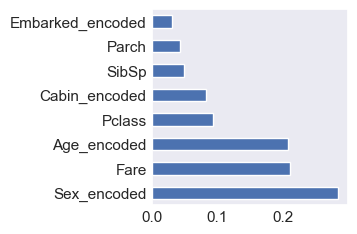

In [214]:
bestfeatures = SelectKBest(k=8)

fit = bestfeatures.fit(X_train, y_train.values.ravel())

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)

# concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns, dfscores], axis=1)

featureScores.columns = ['Specs', 'Score']  # naming the dataframe columns

print(featureScores.nlargest(8, 'Score'))  # print 10 best features

model = ExtraTreesClassifier()

model.fit(X_train, y_train.values.ravel())

print(model.feature_importances_)  # use inbuilt class feature_importances of tree based classifiers

# plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.show()

In [198]:
# show null fare data
test[test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encoded,Embarked_encoded,Cabin_encoded,Age_encoded
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,1,2,76,72


In [ ]:
# fill null fare data with average fare of pclass 3
test_X['Fare'] = test_X['Fare'].fillna(test[test['Pclass'] == 3]['Fare'].mean())

In [191]:
test['Sex_encoded'] = label_encoder.fit_transform(test['Sex'])
test['Embarked_encoded'] = label_encoder.fit_transform(test['Embarked'])
test['Cabin_encoded'] = label_encoder.fit_transform(test['Cabin'])
test['Age_encoded'] = label_encoder.fit_transform(test['Age'])

In [194]:
test_X = test[['Pclass', 'Age_encoded', 'Fare', 'Sex_encoded', 'Cabin_encoded', 'Embarked_encoded', 'SibSp', 'Parch']]

In [215]:
X_train = train[['Pclass', 'Age_encoded', 'Fare', 'Sex_encoded', 'Cabin_encoded', 'Embarked_encoded', 'SibSp', 'Parch']]
y_train = train[['Survived']]

X_test = test_X

In [216]:
info_data(test_X)

,Column,Count,Null,% Null,Type,Unique,Mean,Std,Min,25%,50%,75%,Max,Sample
0,Pclass,418,0,0.0,int64,3,2.27,0.84,1.0,1.0,3.00,3.00,3.00,3.000
1,Age_encoded,418,0,0.0,int64,80,46.46,22.59,0.0,29.0,40.00,67.75,79.00,30.000
2,Fare,418,0,0.0,float64,170,35.57,55.85,0.0,7.9,14.45,31.47,512.33,7.775
3,Sex_encoded,418,0,0.0,int32,2,0.64,0.48,0.0,0.0,1.00,1.00,1.00,0.000
4,Cabin_encoded,418,0,0.0,int32,77,67.44,19.09,0.0,76.0,76.00,76.00,76.00,76.000
5,Embarked_encoded,418,0,0.0,int32,3,1.40,0.85,0.0,1.0,2.00,2.00,2.00,2.000
6,SibSp,418,0,0.0,int64,7,0.45,0.90,0.0,0.0,0.00,1.00,8.00,1.000
7,Parch,418,0,0.0,int64,8,0.39,0.98,0.0,0.0,0.00,0.00,9.00,0.000


# Modelling

In [228]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train.values.ravel())
rfc_pred = rfc.predict(X_test)

rfc_submission = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': rfc_pred})

#score
rfc_score = round(rfc.score(X_train, y_train) * 100, 2)
print(rfc_score)

98.65


In [225]:
# RFC submission
rfc_submission.to_csv('./data/rfc_submission.csv', index=False)